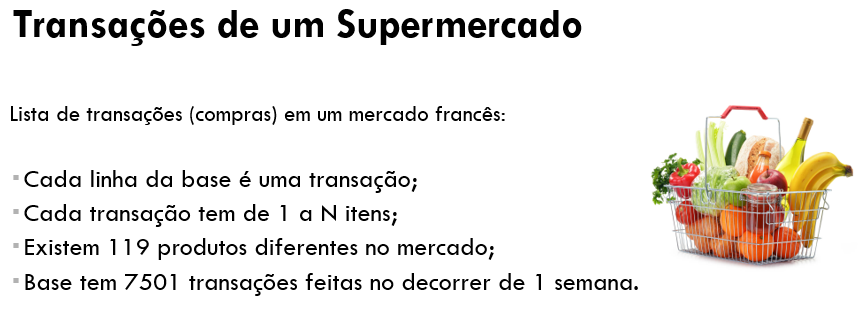

# Carregar base de dados

In [1]:
import pandas as pd
import csv
from mlxtend.preprocessing import TransactionEncoder
!pip install efficient-apriori
from efficient_apriori import apriori

In [2]:
# importa base original (só para visualização)
data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Carregar base como uma lista de itens por transação (não carregaremos NaN -> células em branco)
with open('Market_Basket_Optimisation.csv') as csvfile:
    transactions = list(csv.reader(csvfile))

transactions[0:5] # visualizar primeiras 5 linhas

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']]

# Pré processar a base para transformá-la em uma matriz esparsa. 
Este passo serve somente para entendimento do processo. A biblioteca que utilizaremos (efficient_apriori) não necessita deste passo, pois já é feito internamente.

In [4]:
# Criar matriz esparsa
encoder = TransactionEncoder()
encoder = encoder.fit(transactions)
sparse_matrix = encoder.transform(transactions)
sparse_matrix

array([[ True,  True, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [5]:
# transformá-la em um dataframe com os nomes dos respectivos itens em cada coluna
df = pd.DataFrame(sparse_matrix, columns=encoder.columns_)
df

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,escalope,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [8]:
df.shape

(7501, 119)

# Aplicar o Apriori para encontrar regras de associação

In [11]:
itemsets, rules = apriori(transactions, min_support=0.005, min_confidence=0.2)
print(rules) 

[{almonds} -> {green tea}, {almonds} -> {mineral water}, {avocado} -> {mineral water}, {cottage cheese} -> {green tea}, {cottage cheese} -> {mineral water}, {energy drink} -> {mineral water}, {frozen smoothie} -> {mineral water}, {green tea} -> {mineral water}, {tomato juice} -> {green tea}, {honey} -> {mineral water}, {low fat yogurt} -> {mineral water}, {olive oil} -> {mineral water}, {salmon} -> {mineral water}, {shrimp} -> {mineral water}, {tomato juice} -> {mineral water}, {vegetables mix} -> {mineral water}, {burgers} -> {eggs}, {energy bar} -> {milk}, {energy bar} -> {mineral water}, {mineral water} -> {milk}, {milk} -> {mineral water}, {whole wheat rice} -> {milk}, {whole wheat rice} -> {mineral water}, {frozen vegetables} -> {spaghetti}, {green tea} -> {spaghetti}, {burgers} -> {mineral water}, {cooking oil} -> {eggs}, {cooking oil} -> {mineral water}, {mineral water} -> {eggs}, {eggs} -> {mineral water}, {turkey} -> {eggs}, {turkey} -> {mineral water}, {chicken} -> {chocolate

In [12]:
# imprimir regras ordenadas por lift!
for rule in sorted(rules, key=lambda rule: rule.lift, reverse=True):
  print(rule) 

{pasta} -> {escalope} (conf: 0.373, supp: 0.006, lift: 4.701, conv: 1.468)
{pasta} -> {shrimp} (conf: 0.322, supp: 0.005, lift: 4.507, conv: 1.370)
{whole wheat pasta} -> {olive oil} (conf: 0.271, supp: 0.008, lift: 4.122, conv: 1.282)
{herb & pepper, spaghetti} -> {ground beef} (conf: 0.393, supp: 0.006, lift: 4.004, conv: 1.487)
{herb & pepper, mineral water} -> {ground beef} (conf: 0.391, supp: 0.007, lift: 3.976, conv: 1.480)
{tomato sauce} -> {ground beef} (conf: 0.377, supp: 0.005, lift: 3.841, conv: 1.448)
{mushroom cream sauce} -> {escalope} (conf: 0.301, supp: 0.006, lift: 3.791, conv: 1.317)
{frozen vegetables, spaghetti} -> {tomatoes} (conf: 0.239, supp: 0.007, lift: 3.498, conv: 1.225)
{mineral water, soup} -> {olive oil} (conf: 0.225, supp: 0.005, lift: 3.423, conv: 1.206)
{spaghetti, tomatoes} -> {frozen vegetables} (conf: 0.318, supp: 0.007, lift: 3.341, conv: 1.327)
{herb & pepper} -> {ground beef} (conf: 0.323, supp: 0.016, lift: 3.292, conv: 1.333)
{grated cheese, spa